In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import random
from scipy.stats import pearsonr

from datetime import date

## For the brief history of where this first problem came from, please take a quick look at my article on Medium.

## The final question/scenario in this notebook revolves around cards.  To solve for it, a way to simulate card shuffling was devised.

## The question: if someone has 6 dice, what is the probability that the sum of all dice, in a single roll, will sum to either 6 or 36?

In [2]:
# First, we will create 6 different dataframes.  
# Each will have 2 columns: the values of the die rolled (1-6) and a key to cross join with
d1 = {'d1':list(range(1,7))}

df1 = pd.DataFrame(data=d1)

df1['key'] = 1

d2 = {'d2':list(range(1,7))}

df2 = pd.DataFrame(data=d2)

df2['key'] = 1

d3 = {'d3':list(range(1,7))}

df3 = pd.DataFrame(data=d3)

df3['key'] = 1

d4 = {'d4':list(range(1,7))}

df4 = pd.DataFrame(data=d4)

df4['key'] = 1

d5 = {'d5':list(range(1,7))}

df5 = pd.DataFrame(data=d5)

df5['key'] = 1

d6 = {'d6':list(range(1,7))}

df6 = pd.DataFrame(data=d6)

df6['key'] = 1

In [3]:
# To create a table with all combination of rolls, the individual tables are joined similar
# to a SQL cross join.
df_rolls = pd.merge(df1, df2, on ='key')
df_rolls = pd.merge(df_rolls, df3, on ='key')
df_rolls = pd.merge(df_rolls, df4, on ='key')
df_rolls = pd.merge(df_rolls, df5, on ='key')
df_rolls = pd.merge(df_rolls, df6, on ='key').drop("key", 1)

df_rolls.head(12)

,d1,d2,d3,d4,d5,d6
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,1,4
4,1,1,1,1,1,5
5,1,1,1,1,1,6
6,1,1,1,1,2,1
7,1,1,1,1,2,2
8,1,1,1,1,2,3
9,1,1,1,1,2,4


In [4]:
# A column used to sum each of the 6 dice
df_rolls['roll_sum'] = df_rolls['d1'] + df_rolls['d2'] + df_rolls['d3'] \
    + df_rolls['d4'] + df_rolls['d5'] + df_rolls['d6'] 

In [5]:
# A lambda function used to identify the rows where the sum is either 6 or 36
df_rolls['winner'] = df_rolls[['roll_sum']].apply(lambda x: 'W' if (x['roll_sum'] == 6) | (x['roll_sum'] == 36)\
                                else 'L', axis=1)

In [6]:
# Create a table that groups by the W/L column created
# Because we have labeled each row as either W or L, we can now use value_counts()
# to count the winners and also get a % of winners out of all possible combinations.
w1 = pd.DataFrame(df_rolls.winner.value_counts().reset_index())
w1.rename(columns={'index':'win_or_lose', 'winner':'possible_outcomes'}, inplace=True)

In [7]:
# Create a table that groups by the W/L column created and shows results as a %
w2 = pd.DataFrame(df_rolls.winner.value_counts(normalize=True).reset_index())
w2.rename(columns={'index':'win_or_lose', 'winner':'possible_outcomes_pct'}, inplace=True)

## The answer to the probability of rolling 6 dice and having a sum of either 6 or 36:

In [8]:
w1 = w1.merge(w2, how='left', on='win_or_lose')
w1

,win_or_lose,possible_outcomes,possible_outcomes_pct
0,L,46654,0.999957
1,W,2,0.000043


In [9]:
# A dataframe that shows the probabability for each possible sum
pd.DataFrame(df_rolls.roll_sum.value_counts(normalize=True).reset_index()).sort_values('index')

,index,roll_sum
29,6,0.000021
27,7,0.000129
25,8,0.000450
23,9,0.001200
21,10,0.002701
19,11,0.005401
18,12,0.009774
16,13,0.016204
14,14,0.024884
12,15,0.035708


(array([1.000e+00, 6.000e+00, 2.100e+01, 5.600e+01, 1.260e+02, 2.520e+02,
        4.560e+02, 7.560e+02, 1.161e+03, 1.666e+03, 2.247e+03, 2.856e+03,
        3.431e+03, 3.906e+03, 4.221e+03, 4.332e+03, 4.221e+03, 3.906e+03,
        3.431e+03, 2.856e+03, 2.247e+03, 1.666e+03, 1.161e+03, 7.560e+02,
        4.560e+02, 2.520e+02, 1.260e+02, 5.600e+01, 2.100e+01, 6.000e+00,
        1.000e+00]),
 array([ 6.        ,  6.96774194,  7.93548387,  8.90322581,  9.87096774,
        10.83870968, 11.80645161, 12.77419355, 13.74193548, 14.70967742,
        15.67741935, 16.64516129, 17.61290323, 18.58064516, 19.5483871 ,
        20.51612903, 21.48387097, 22.4516129 , 23.41935484, 24.38709677,
        25.35483871, 26.32258065, 27.29032258, 28.25806452, 29.22580645,
        30.19354839, 31.16129032, 32.12903226, 33.09677419, 34.06451613,
        35.03225806, 36.        ]),
 <BarContainer object of 31 artists>)

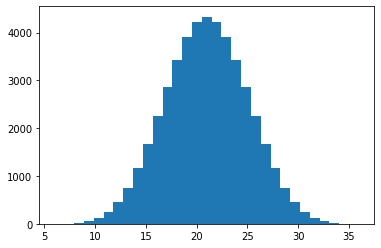

In [10]:
# Visualizing the distribution of possible sums
plt.hist(df_rolls.roll_sum, bins=31)

## What is the probability of the sum of the 6 dice being a number divisible by 2 and 3?

In [11]:
# A lambda function used to identify the rows where the sum is even
df_rolls['winner_even'] = df_rolls[['roll_sum']].apply(lambda x: \
                'W' if (x['roll_sum'] % 2 == 0) & (x['roll_sum'] % 3 == 0) else 'L', axis=1)

In [12]:
# Create a table that groups by the W/L column created
w1_even = pd.DataFrame(df_rolls.winner_even.value_counts().reset_index())
w1_even.rename(columns={'index':'win_or_lose', 'winner_even':'possible_outcomes'}, inplace=True)

In [13]:
# Create a table that groups by the W/L column created and shows results as a %
w2_even = pd.DataFrame(df_rolls.winner_even.value_counts(normalize=True).reset_index())
w2_even.rename(columns={'index':'win_or_lose', 'winner_even':'possible_outcomes_pct'}, inplace=True)

In [14]:
w1_even = w1_even.merge(w2_even, how='left', on='win_or_lose')
w1_even

,win_or_lose,possible_outcomes,possible_outcomes_pct
0,L,38880,0.833333
1,W,7776,0.166667


# What is the probability of rolling all 6 dice and having only 2 dice showing the same value/rolling only a single pair?

In [15]:
# Create a column that will combine the dice values into a list
df_rolls['combined'] = df_rolls[['d1', 'd2', 'd3', 'd4', 'd5', 'd6']].values.tolist()

In [16]:
# Create a column that will identify rows where only 2 dice show as duplicates
# For each row, look at the list, use set() to get the unique values, and then
# use len() to count those values.  If there are 5, call it a 'W'.
df_rolls['single_dup'] = df_rolls[['combined']].\
    apply(lambda x: 'W' if len(set(x['combined'])) == 5 else 'L', axis=1) 

In [17]:
# Show a few winner/loser scenarios
df_rolls[['d1', 'd2', 'd3', 'd4', 'd5', 'd6', 'combined', 'single_dup']].sample(5, random_state=6)

,d1,d2,d3,d4,d5,d6,combined,single_dup
44576,6,5,3,3,2,3,"[6, 5, 3, 3, 2, 3]",L
42020,6,3,3,4,2,3,"[6, 3, 3, 4, 2, 3]",L
3465,1,3,5,1,2,4,"[1, 3, 5, 1, 2, 4]",W
41192,6,2,5,5,2,3,"[6, 2, 5, 5, 2, 3]",L
22272,3,6,2,1,5,1,"[3, 6, 2, 1, 5, 1]",W


In [18]:
# Create a table that groups by the W/L column created
w1_single_dup = pd.DataFrame(df_rolls.single_dup.value_counts().reset_index())
w1_single_dup.rename(columns={'index':'win_or_lose', 'single_dup':'possible_outcomes'}, inplace=True)

In [19]:
# Create a table that groups by the W/L column created and shows results as a %
w2_single_dup = pd.DataFrame(df_rolls.single_dup.value_counts(normalize=True).reset_index())
w2_single_dup.rename(columns={'index':'win_or_lose', 'single_dup':'possible_outcomes_pct'}, inplace=True)

In [20]:
w1_single_dup = w1_single_dup.merge(w2_single_dup, how='left', on='win_or_lose')
w1_single_dup

,win_or_lose,possible_outcomes,possible_outcomes_pct
0,L,35856,0.768519
1,W,10800,0.231481


## When continuously pulling the top card from a deck of cards, what is the probability that all four Aces will be pulled in the first half of the deck?  The trick to this problem is that there are so many possible combinations for a deck to be shuffled/ordered, that I'm not sure my computer can handle the compuations.  Instead, 1 million decks will be simulated as a proxy.

In [21]:
# Create 4 dataframes, one for each suit of cards
d1_card = {'card_num':list(range(2,15))}

df1_card = pd.DataFrame(data=d1_card)

df1_card['symbol'] = 'Hearts'

d2_card = {'card_num':list(range(2,15))}

df2_card = pd.DataFrame(data=d2_card)

df2_card['symbol'] = 'Spades'

d3_card = {'card_num':list(range(2,15))}

df3_card = pd.DataFrame(data=d3_card)

df3_card['symbol'] = 'Diamonds'

d4_card = {'card_num':list(range(2,15))}

df4_card = pd.DataFrame(data=d4_card)

df4_card['symbol'] = 'Clubs'


#Combine the 52 cards together

frames = [df1_card, df2_card, df3_card, df4_card]

df_cards = pd.concat(frames, ignore_index=True)


#Create a new column that will change values 11-14 to their respective face card value

df_cards['face_value'] = df_cards[['card_num']].apply(lambda x: 'J' if x['card_num'] == 11\
                                                else ('Q' if x['card_num'] == 12\
                                                    else ('K' if x['card_num'] == 13\
                                                        else ('A' if x['card_num'] == 14 else x['card_num']\
                                                             )\
                                                         )\
                                                     )\
                                               , axis=1
                                               )

# Let's not start with the cards ordered.  Let's give one quick shuffle.
df_cards = df_cards.sample(frac=1, random_state=0).reset_index()

df_cards

,index,card_num,symbol,face_value
0,28,4,Diamonds,4
1,37,13,Diamonds,K
2,11,13,Hearts,K
3,34,10,Diamonds,10
4,2,4,Hearts,4
5,30,6,Diamonds,6
6,40,3,Clubs,3
7,32,8,Diamonds,8
8,26,2,Diamonds,2
9,4,6,Hearts,6


In [22]:
# In the example above, we see the final Ace is located at the 37th index, 
# or the 38th card that is drawn.  Let's double check that this can be
# captured easily and accurately.

# Pull cards that are Aces, find the Max index and add 1 to that value
df_cards[df_cards.face_value == 'A'].index.max() + 1

38

In [23]:
# In this example, the random_state will change to a 1
# The last Ace is the final, or 52nd, card
df_cards.sample(frac=1, random_state=1).reset_index()

,level_0,index,card_num,symbol,face_value
0,31,13,2,Spades,2
1,2,11,13,Hearts,K
2,42,36,12,Diamonds,Q
3,32,25,14,Spades,A
4,30,8,10,Hearts,10
5,45,9,11,Hearts,J
6,33,17,6,Spades,6
7,38,46,9,Clubs,9
8,44,19,8,Spades,8
9,19,50,13,Clubs,K


In [24]:
# Let's take the same deck and shuffle it in the same manner 
# (by changing the random_state) and checking the placement of the final Ace.
shuffle_1 = df_cards.sample(frac=1, random_state=1).reset_index()

shuffle_1[shuffle_1.face_value == 'A'].index.max() + 1

52

In [25]:
# Another test, using 2 as the random_state
df_cards.sample(frac=1, random_state=2).reset_index()

,level_0,index,card_num,symbol,face_value
0,37,12,14,Hearts,A
1,36,1,3,Hearts,3
2,32,25,14,Spades,A
3,39,24,13,Spades,K
4,47,48,11,Clubs,J
5,0,28,4,Diamonds,4
6,27,51,14,Clubs,A
7,1,37,13,Diamonds,K
8,23,15,4,Spades,4
9,13,29,5,Diamonds,5


In [26]:
# Just as above, the final Ace is at index 41, or the 42nd card.
shuffle_2 = df_cards.sample(frac=1, random_state=2).reset_index()

shuffle_2[shuffle_2.face_value == 'A'].index.max() + 1

42

(array([3.0000e+00, 1.7000e+01, 3.7000e+01, 7.2000e+01, 1.2600e+02,
        2.1700e+02, 3.1700e+02, 4.2200e+02, 6.3000e+02, 8.2400e+02,
        1.0510e+03, 1.3650e+03, 1.6630e+03, 2.0290e+03, 2.5770e+03,
        2.9040e+03, 3.5310e+03, 4.1880e+03, 4.8560e+03, 5.6720e+03,
        6.5150e+03, 7.3600e+03, 8.3820e+03, 9.5660e+03, 1.0826e+04,
        1.2213e+04, 1.3389e+04, 1.4971e+04, 1.6583e+04, 1.8355e+04,
        2.0384e+04, 2.2271e+04, 2.4118e+04, 2.6427e+04, 2.8597e+04,
        3.1109e+04, 3.3516e+04, 3.6305e+04, 3.9625e+04, 4.2417e+04,
        4.5427e+04, 4.8775e+04, 5.2415e+04, 5.6216e+04, 5.9958e+04,
        6.4055e+04, 6.8365e+04, 7.2570e+04, 7.6789e+04]),
 array([ 4.        ,  4.97959184,  5.95918367,  6.93877551,  7.91836735,
         8.89795918,  9.87755102, 10.85714286, 11.83673469, 12.81632653,
        13.79591837, 14.7755102 , 15.75510204, 16.73469388, 17.71428571,
        18.69387755, 19.67346939, 20.65306122, 21.63265306, 22.6122449 ,
        23.59183673, 24.57142857, 25.5

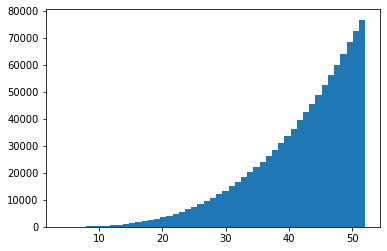

In [27]:
# A list to house results.  For each iteration/deck of cards, an integer will be appended
# which will show the numbered placement of the final Ace.
last_ace = []

for n in range(0,1000000):
    # Since n will go up by 1 for each iteration, that value will then be put 
    # into the sample() function as the random_state argument.
    # This will allow for the cards to be shuffled differently
    # and will also allow for anyone using the same process
    # to be able to reproduce the results.
    shuffled_deck = df_cards.sample(frac=1, random_state=n).reset_index()
    
    #Find the index of the last Ace and add 1 to that index to get the card number
    last_ace.append(shuffled_deck[shuffled_deck.face_value == 'A'].index.max() + 1)

# A quick histogram to show the results
plt.hist(last_ace, bins=((max(last_ace) - min(last_ace))+1))

In [28]:
results = pd.DataFrame(pd.Series(last_ace).value_counts()).reset_index()

In [29]:
results.rename(columns={'index':'final_ace_placement', 0:'ace_count'}, inplace=True)

# Since a cumsum() will be used, the order of the rows matters
results.sort_values(by='final_ace_placement', inplace=True)

results['cumulative_deck_count'] = results.ace_count.cumsum()

# Create a column that will show the probability of pulling all 4 aces
# by that number card or prior
results['cumulative_probability'] = results['cumulative_deck_count'] / results['ace_count'].sum()

results

,final_ace_placement,ace_count,cumulative_deck_count,cumulative_probability
48,4,3,3,0.000003
47,5,17,20,0.000020
46,6,37,57,0.000057
45,7,72,129,0.000129
44,8,126,255,0.000255
43,9,217,472,0.000472
42,10,317,789,0.000789
41,11,422,1211,0.001211
40,12,630,1841,0.001841
39,13,824,2665,0.002665


In [30]:
results[results.final_ace_placement == 26]

,final_ace_placement,ace_count,cumulative_deck_count,cumulative_probability
26,26,8382,54758,0.054758


## In a simulation of 1 million decks of cards, there's roughly just under a 5.5% chance of pulling all 4 aces in the first half/26 cards of the deck.

## Additionally, the odds of pulling only 4 cards and having them all be the same value is shown below, which matches to the % of occurences above.

In [33]:
'{:.8f}'.format((1/13) * (1/17) * (1/26) * (1/51))

'0.00000341'